In [3]:
#Importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import time
import math
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [4]:
#Uploading all the datasets
confirmed_cases=pd.read_csv('C:/Users/Ritika/Desktop/covid19_datasets/time_series_covid_19_confirmed.csv')

In [5]:
deaths_reported=pd.read_csv('C:/Users/Ritika/Desktop/covid19_datasets/time_series_covid_19_deaths.csv')

In [6]:
recovered_cases=pd.read_csv('C:/Users/Ritika/Desktop/covid19_datasets/time_series_covid_19_recovered.csv')

In [7]:
#Display the head of dataset i.e. to see top 5 rows
confirmed_cases.head()  

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020,5/29/2020,5/30/2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,969,981,989,998,1004,1029,1050,1076,1099,1122
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,762,763,763,763,763,764,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,58,60,61,69,70,70,71,74,81,84


In [8]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020,5/29/2020,5/30/2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,193,205,216,218,219,220,227,235,246,249
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,32,32,33,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,575,582,592,600,609,617,623,630,638,646
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,4,4,4,4,4,4,4,4


In [9]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020,5/29/2020,5/30/2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,938,996,1040,1075,1097,1128,1138,1209,1259,1303
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,771,777,783,789,795,803,812,823,851,857
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,639,652,653,653,663,676,676,681,684,692
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,17,18,18,18,18,18,18,18,18


In [10]:
#Extracting all the columns using .keys() function
cols=confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/2020',
       '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020', '1/27/2020',
       ...
       '5/21/2020', '5/22/2020', '5/23/2020', '5/24/2020', '5/25/2020',
       '5/26/2020', '5/27/2020', '5/28/2020', '5/29/2020', '5/30/2020'],
      dtype='object', length=134)

In [11]:
#Extracting only the date columns that have information of confirmed, recovered, deaths cases 
#:-need all rows
#2nd parameter-data needed from 4th column till last column
confirmed=confirmed_cases.loc[:,cols[4]:cols[-1]]

In [12]:
deaths=deaths_reported.loc[:,cols[4]:cols[-1]]

In [13]:
recoveries=recovered_cases.loc[:,cols[4]:cols[-1]]

In [14]:
#Check the head of outbreak cases
confirmed.head()

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020,5/29/2020,5/30/2020
0,0,0,0,0,0,0,0,0,0,0,...,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525
1,0,0,0,0,0,0,0,0,0,0,...,969,981,989,998,1004,1029,1050,1076,1099,1122
2,0,0,0,0,0,0,0,0,0,0,...,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267
3,0,0,0,0,0,0,0,0,0,0,...,762,762,762,762,763,763,763,763,764,764
4,0,0,0,0,0,0,0,0,0,0,...,58,60,61,69,70,70,71,74,81,84


In [15]:
#Finding the total confirmed cases, death cases, recovered cases and append them to an empty list
#Also calculate total mortality rate which is the deaths_sum/confirmed_sum

dates=confirmed.keys()
world_cases=[]
total_death=[]
mortality_rate=[]
total_recovered=[]

for i in dates:
    confirmed_sum=confirmed[i].sum()
    deaths_sum=deaths[i].sum()
    recovered_sum=recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_death.append(deaths_sum)
    mortality_rate.append(deaths_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [16]:
#Displaying each of the newly created variable
confirmed_sum

6059017

In [17]:
deaths_sum

369126

In [18]:
recovered_sum

2564693

In [19]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97888,
 101806,
 105848,
 109822,
 113595,
 118623,
 125879,
 131007,
 145225,
 156120,
 167507,
 181653,
 197150,
 214873,
 242632,
 272264,
 304580,
 337022,
 378301,
 418295,
 467817,
 529722,
 593764,
 661174,
 720291,
 782816,
 857608,
 933010,
 1013863,
 1096324,
 1176436,
 1249743,
 1321436,
 1396438,
 1480232,
 1566102,
 1658261,
 1736412,
 1835145,
 1905165,
 1975566,
 2055748,
 2152181,
 2239990,
 2317636,
 2400787,
 2472109,
 2549046,
 2624608,
 2708403,
 2795731,
 2881140,
 2955033,
 3023722,
 3097229,
 3172287,
 3256910,
 3345558,
 3427584,
 3506729,
 3583055,
 3662691,
 3756069,
 3845718,
 3938064,
 4024009,
 4101699,
 4177502,
 4261747,
 4347018

In [20]:
#Convert all the dates and cases in the form of numpy array
days_since_1_22=np.array([i for i in range (len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)
total_death=np.array(total_death).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)

In [21]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [22]:
world_cases

array([[    555],
       [    654],
       [    941],
       [   1434],
       [   2118],
       [   2927],
       [   5578],
       [   6166],
       [   8234],
       [   9927],
       [  12038],
       [  16787],
       [  19881],
       [  23892],
       [  27635],
       [  30794],
       [  34391],
       [  37120],
       [  40150],
       [  42762],
       [  44802],
       [  45221],
       [  60368],
       [  66885],
       [  69030],
       [  71224],
       [  73258],
       [  75136],
       [  75639],
       [  76197],
       [  76819],
       [  78572],
       [  78958],
       [  79561],
       [  80406],
       [  81388],
       [  82746],
       [  84112],
       [  86011],
       [  88369],
       [  90306],
       [  92840],
       [  95120],
       [  97888],
       [ 101806],
       [ 105848],
       [ 109822],
       [ 113595],
       [ 118623],
       [ 125879],
       [ 131007],
       [ 145225],
       [ 156120],
       [ 167507],
       [ 181653],
       [ 1

In [23]:
total_death

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2007],
       [  2122],
       [  2247],
       [  2251],
       [  2458],
       [  2469],
       [  2629],
       [  2708],
       [  2770],
       [  2814],
       [  2872],
       [  2941],
       [  2996],
       [  3085],
       [  3160],
       [  3254],
       [  3347],
       [  3459],
       [  3558],
       [  3801],
       [  3987],
       [  4263],
       [  4614],
       [  4912],
       [  5409],
       [  5832],
       [  6473],
       [  7151],
       [  7957],
       [  8824],
       [  9947],
       [ 11423

In [24]:
total_recovered

array([[     28],
       [     30],
       [     36],
       [     39],
       [     52],
       [     61],
       [    107],
       [    126],
       [    143],
       [    222],
       [    284],
       [    472],
       [    623],
       [    852],
       [   1124],
       [   1487],
       [   2011],
       [   2616],
       [   3244],
       [   3946],
       [   4683],
       [   5150],
       [   6295],
       [   8058],
       [   9395],
       [  10865],
       [  12583],
       [  14352],
       [  16121],
       [  18177],
       [  18890],
       [  22886],
       [  23394],
       [  25227],
       [  27905],
       [  30384],
       [  33277],
       [  36711],
       [  39782],
       [  42716],
       [  45602],
       [  48228],
       [  51170],
       [  53796],
       [  55865],
       [  58358],
       [  60694],
       [  62494],
       [  64404],
       [  67003],
       [  68324],
       [  70251],
       [  72622],
       [  76032],
       [  78086],
       [  

In [25]:
#Future forcasting for next 10 days
days_in_future=10
future_forecast=np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates=future_forecast[:-10]

In [26]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [27]:
#Convert all the integers into datetime for better visualization
start='1/2/2020'
start_date=datetime.datetime.strptime(start,'1/2/2020')
future_forecast_dates=[]
for i in range (len(future_forecast)):
    future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%y'))

In [73]:
#For visualization with the latest data 
latest_confirmed=confirmed_cases[dates[-1]]
latest_deaths=deaths_reported[dates[-1]]
latest_recoveries=recovered_cases[dates[-1]]

In [29]:
latest_confirmed

0       14525
1        1122
2        9267
3         764
4          84
5          25
6       16214
7        8927
8         107
9        3095
10         29
11       1058
12        440
13        228
14       1649
15        586
16      16685
17       5246
18        102
19      10793
20      44608
21         92
22      41658
23      58186
24        224
25         33
26       9592
27       2494
28     498440
29        141
        ...  
236        24
237        18
238        19
239       130
240       447
241      1256
242      1250
243        15
244         5
245        11
246      1064
247       224
248         3
249         8
250        12
251         9
252        35
253        63
254       852
255         6
256       279
257        13
258         1
259       994
260         9
261       479
262       310
263       106
264      3807
265         2
Name: 5/30/2020, Length: 266, dtype: int64

In [30]:
latest_deaths

0        249
1         33
2        646
3         51
4          4
5          3
6        528
7        127
8          3
9         48
10         0
11         7
12         4
13        13
14        19
15         9
16       668
17        61
18        11
19        17
20       610
21         7
22       229
23      9453
24         3
25         0
26       310
27       153
28     28834
29         2
       ...  
236        0
237        2
238        0
239        5
240        3
241        8
242       76
243        0
244        0
245        0
246       30
247        6
248        0
249        1
250        1
251        2
252        1
253        1
254       46
255        0
256        4
257        0
258        0
259       10
260        1
261       12
262       77
263        2
264       47
265        0
Name: 5/30/2020, Length: 266, dtype: int64

In [31]:
latest_recoveries

0        1303
1         857
2        5549
3         692
4          18
5          19
6        4788
7        3317
8         104
9        2685
10         29
11       1046
12        435
13        206
14       1557
15        552
16      15520
17       3327
18         48
19       5826
20       9375
21         76
22      17964
23      15769
24         16
25        136
26          6
27        889
28       1831
29     200892
        ...  
223         0
224       682
225    416461
226      2783
227       302
228       279
229       779
230        29
231       368
232        16
233       829
234       130
235         3
236         7
237        11
238         0
239        20
240        33
241       415
242         6
243        42
244        13
245         1
246         6
247         6
248        68
249        13
250        26
251      1865
252         1
Name: 5/30/2020, Length: 253, dtype: int64

In [32]:
#Find the list of unique countries
unique_countries=list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [33]:
#Calculating total number of confirmed cases by each country
country_confirmed_cases=[]
no_cases=[]
for i in unique_countries:
    cases=latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases>0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_countries.remove(i)

unique_countries=[k for k,v in sorted(zip(unique_countries,country_confirmed_cases),key=operator.itemgetter(1),reverse=True)]
for i in range (len(unique_countries)):
    country_confirmed_cases[i]=latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [34]:
#number of cases per country/region
print('Confirmed cases by Country/Region: ')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}:{country_confirmed_cases[i]} cases')

Confirmed cases by Country/Region: 
US:1770165 cases
Brazil:498440 cases
Russia:396575 cases
United Kingdom:274219 cases
Spain:239228 cases
Italy:232664 cases
France:188752 cases
Germany:183189 cases
India:181827 cases
Turkey:163103 cases
Peru:155671 cases
Iran:148950 cases
Chile:94858 cases
Canada:91681 cases
Mexico:87512 cases
China:84128 cases
Saudi Arabia:83384 cases
Pakistan:66457 cases
Belgium:58186 cases
Qatar:55262 cases
Netherlands:46460 cases
Bangladesh:44608 cases
Belarus:41658 cases
Ecuador:38571 cases
Sweden:37113 cases
Singapore:34366 cases
United Arab Emirates:33896 cases
Portugal:32203 cases
South Africa:30967 cases
Switzerland:30845 cases
Colombia:26734 cases
Kuwait:26192 cases
Indonesia:25773 cases
Ireland:24929 cases
Poland:23571 cases
Egypt:23449 cases
Ukraine:23204 cases
Romania:19133 cases
Philippines:17224 cases
Israel:17012 cases
Dominican Republic:16908 cases
Japan:16716 cases
Austria:16685 cases
Argentina:16214 cases
Afghanistan:14525 cases
Panama:13018 cases


In [35]:
#Find the list of Unique provinces
unique_provinces=list(confirmed_cases['Country/Region'].unique())
#those countries which are not provinces/states
outliers=['United Kingdom','Denmark','France']
for i in outliers:
    unique_provinces.remove(i)

In [36]:
#Finding the number of cases per province, state or city
province_confirmed_cases=[]
no_cases=[]
for i in unique_provinces:
    cases=latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases>0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_provinces.remove(i)

In [37]:
#number of cases per province/state/city
for i in range(len(unique_provinces)):
     print(f'{unique_provinces[i]}:{province_confirmed_cases[i]} cases')

Diamond Princess:1 cases


In [38]:
#handling nan values if any
nan_indices=[]
for i in range(len(unique_provinces)):
    if type(unique_provinces[i])==float:
        nan_indices.append(i)
unique_provinces=list(unique_provinces)
province_confirmed_cases=list(province_confirmed_cases)
for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)
    
#Done with preparing the data for visualization

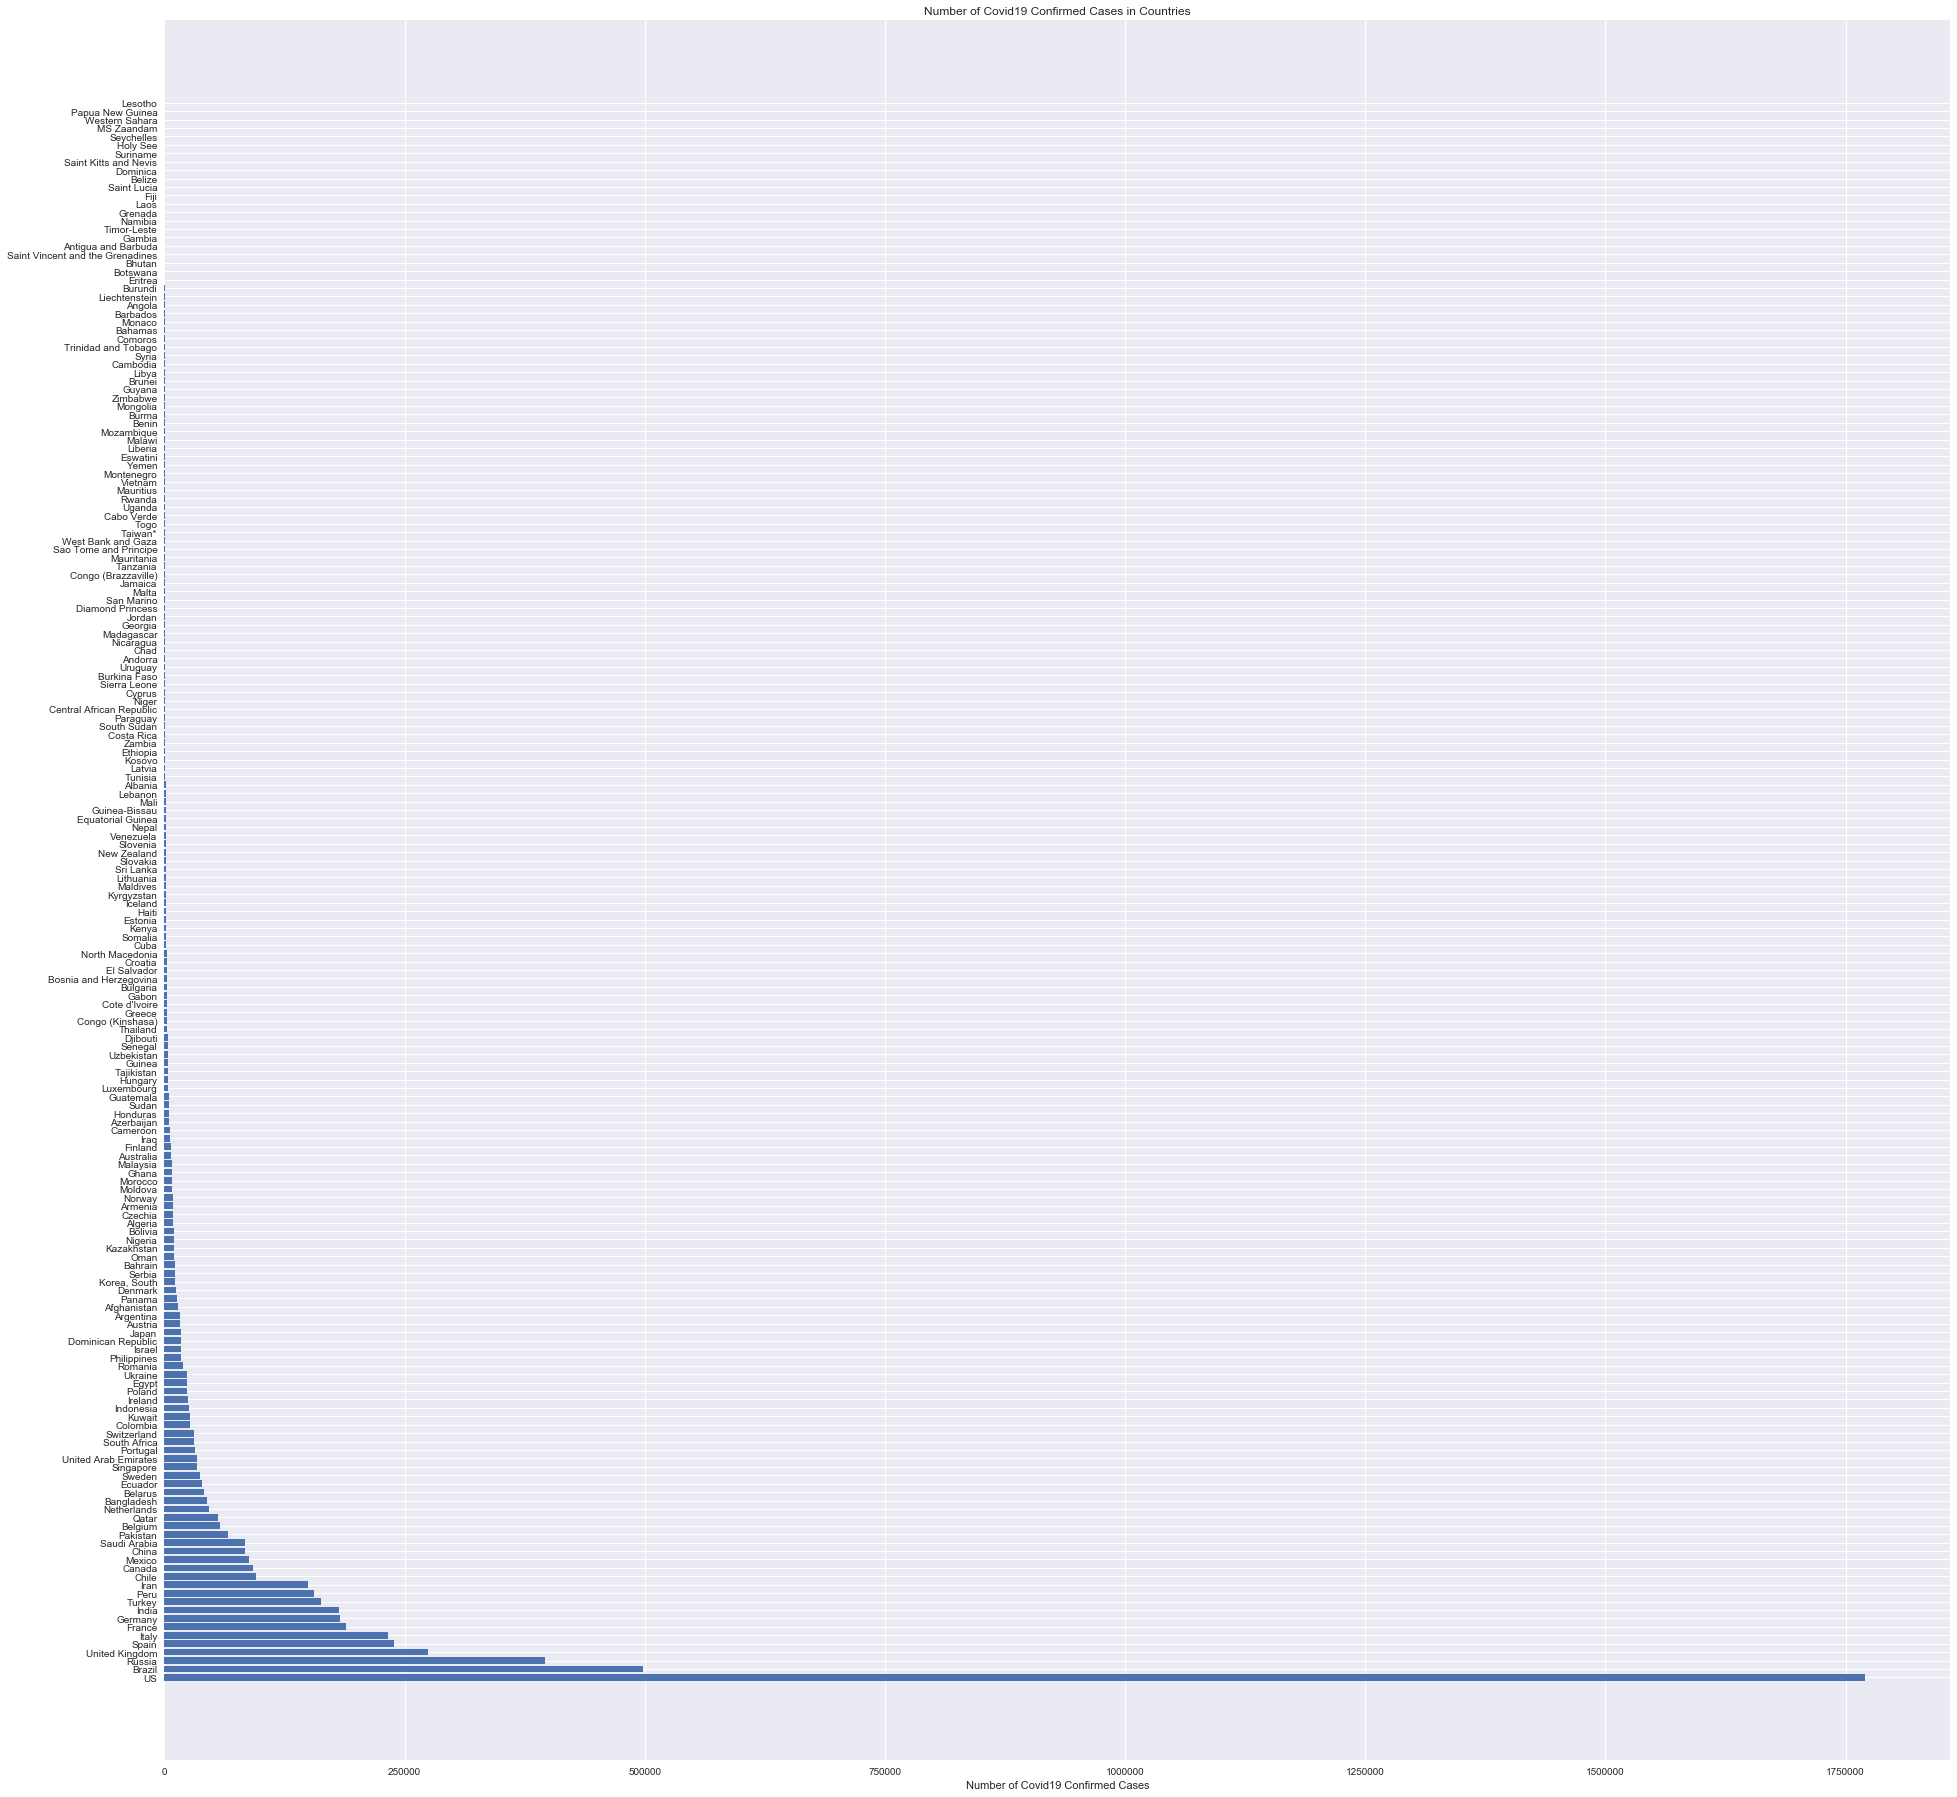

In [39]:
#Plot a bar graph to see total confirmed cases across different countries
plt.figure(figsize=(32,32))
plt.barh(unique_countries,country_confirmed_cases)
plt.title('Number of Covid19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

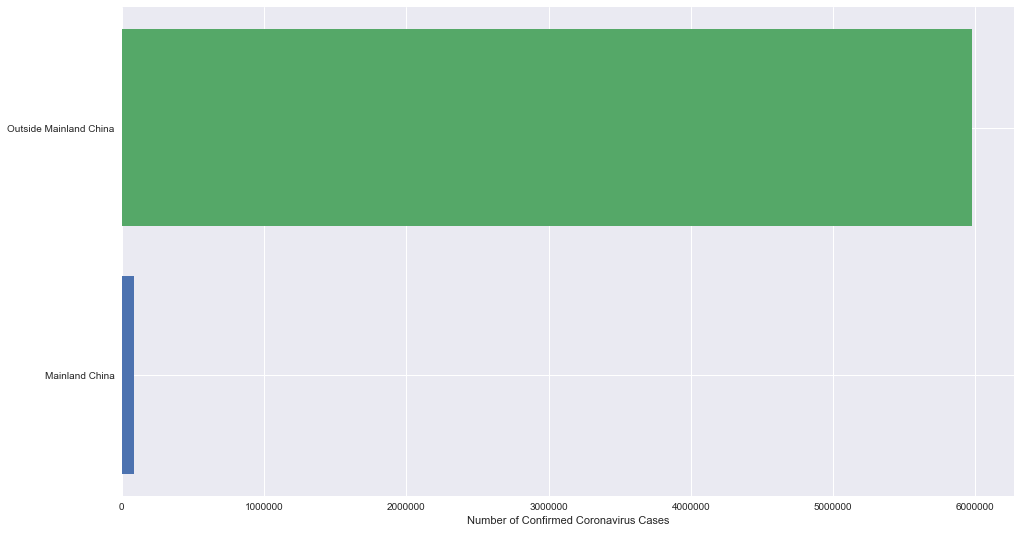

In [40]:
#Plot a bar graph to see total confirmed cases between mainland china and outside china
china_confirmed=latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed=np.sum(country_confirmed_cases)-china_confirmed
plt.figure(figsize=(16,9))
plt.barh('Mainland China',china_confirmed)
plt.barh('Outside Mainland China',outside_mainland_china_confirmed)
plt.xlabel('Number of Confirmed Coronavirus Cases')
plt.show()

In [41]:
#Print total numbers of cases in mainland china and outside of it
print('Outside Mainland China {} cases'.format(outside_mainland_china_confirmed))
print('Mainland China {} cases'.format(china_confirmed))
print('Total {} cases'.format(outside_mainland_china_confirmed+china_confirmed))

Outside Mainland China 5974889 cases
Mainland China 84128 cases
Total 6059017 cases


In [42]:
#only show 10 countries with the most confirmed cases,the rest are grouped into category named others
visual_unique_countries=[]
visual_confirmed_cases=[]
others=np.sum(country_confirmed_cases[10:])
for i in range (len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

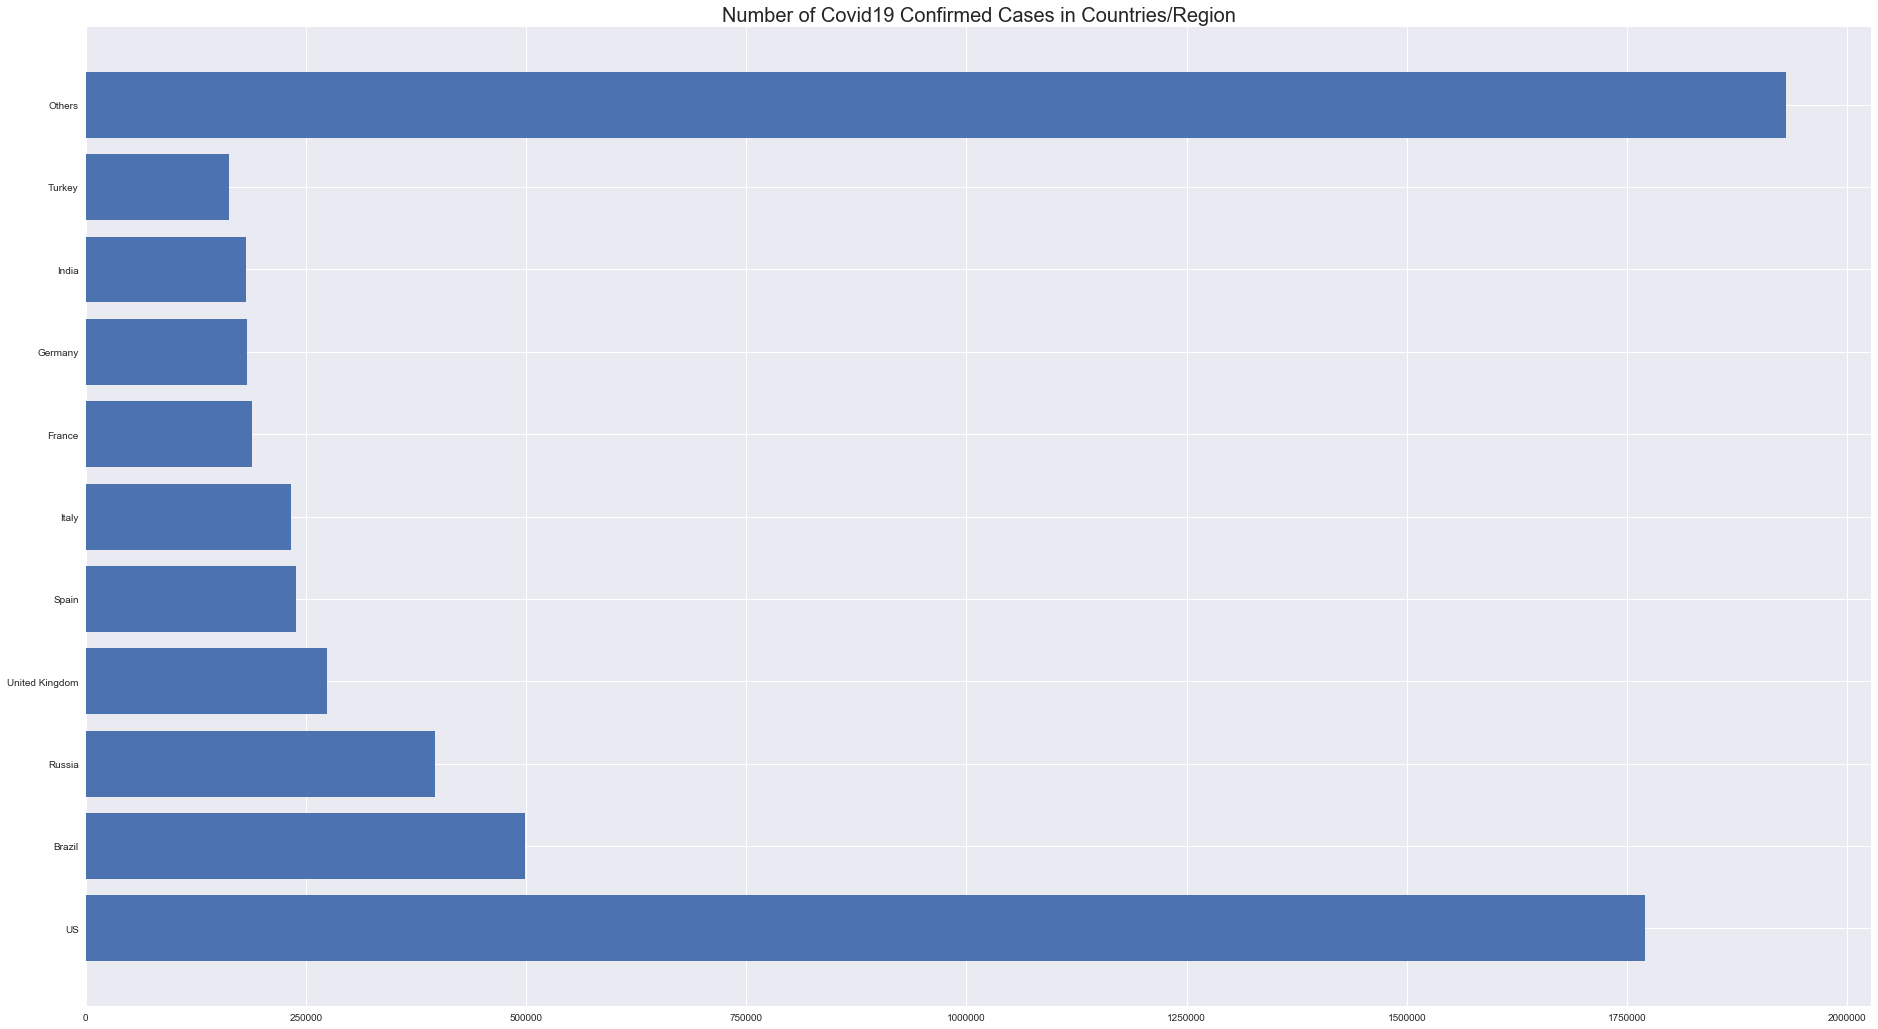

In [43]:
#Visualize 10 countries

plt.figure(figsize=(32,18))
plt.barh(visual_unique_countries,visual_confirmed_cases)
plt.title('Number of Covid19 Confirmed Cases in Countries/Region',size=20)
plt.show()

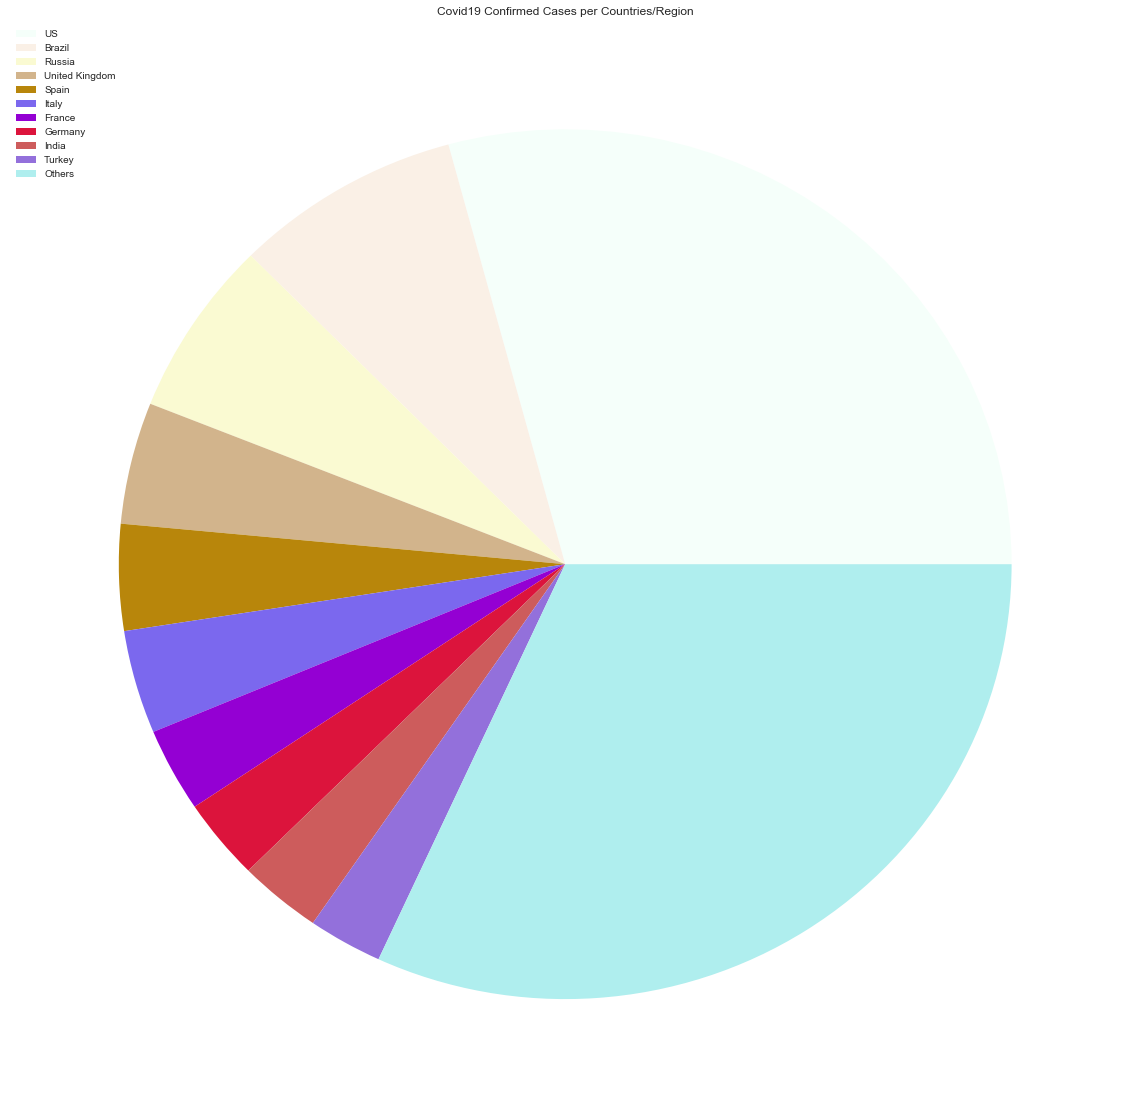

In [44]:
#Create a pie chart to see the total confirmed cases in 10 different countries
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid19 Confirmed Cases per Countries/Region')
plt.pie(visual_confirmed_cases,colors=c)
plt.legend(visual_unique_countries,loc='best')
plt.show()

In [45]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)

In [46]:
#Building SVM(support vector machine algorithm) model
#differnt parameters of SVM model
kernel=['poly','sigmoid','rbf']  #types of kernel to be used in algorithm(ploy,sigmoid,rbf,computed,callable) default:rbf
c=[0.01,0.1,1,10]                #regularisation parameter
gamma=[0.01,0.1,1]               #kernel coefficent
epsilon=[0.01,0.1,1]             #epsilon tube within which no penality is associated in the training loss function
shrinking=[True,False]
svm_grid={'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

svm=SVR()
svm_search=RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1,n_iter=40,verbose=1)
#it will take some time as we have defined epoch or iteration(n_iter=40)
svm_search.fit(X_train_confirmed, y_train_confirmed)    #fitting data

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.3min finished
C:\Users\Ritika\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=40, n_jobs=-1,
          param_distributions={'kernel': ['poly', 'sigmoid', 'rbf'], 'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'epsilon': [0.01, 0.1, 1], 'shrinking': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=1)

In [47]:
svm_search.best_params_ #best parameters for the model

{'shrinking': False, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 0.01, 'C': 10}

In [48]:
svm_confirmed=svm_search.best_estimator_   #best estimator
svm_pred=svm_confirmed.predict(future_forecast)

In [49]:
svm_confirmed

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.01,
  kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [50]:
svm_pred

array([-1.27254651e+04, -1.27221487e+04, -1.26989334e+04, -1.26359207e+04,
       -1.25132117e+04, -1.23109076e+04, -1.20091097e+04, -1.15879192e+04,
       -1.10274375e+04, -1.03077656e+04, -9.40900484e+03, -8.31125649e+03,
       -6.99462177e+03, -5.43920190e+03, -3.62509813e+03, -1.53241170e+03,
        8.58756150e+02,  3.56830419e+03,  6.61613118e+03,  1.00221359e+04,
        1.38062170e+04,  1.79882734e+04,  2.25882038e+04,  2.76259070e+04,
        3.31212816e+04,  3.90942266e+04,  4.55646406e+04,  5.25524224e+04,
        6.00774707e+04,  6.81596844e+04,  7.68189621e+04,  8.60752028e+04,
        9.59483050e+04,  1.06458168e+05,  1.17624689e+05,  1.29467769e+05,
        1.42007305e+05,  1.55263197e+05,  1.69255343e+05,  1.84003642e+05,
        1.99527992e+05,  2.15848293e+05,  2.32984443e+05,  2.50956341e+05,
        2.69783886e+05,  2.89486977e+05,  3.10085512e+05,  3.31599389e+05,
        3.54048509e+05,  3.77452769e+05,  4.01832068e+05,  4.27206306e+05,
        4.53595380e+05,  

MAE: 615548.0251842027
MSE: 445425031983.66064


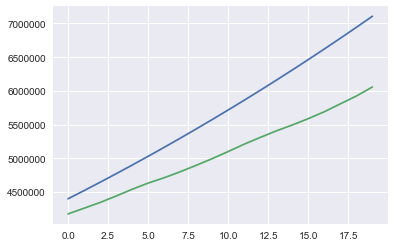

In [51]:
#check against testing data

svm_test_pred=svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:',mean_absolute_error(svm_test_pred,y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred,y_test_confirmed))

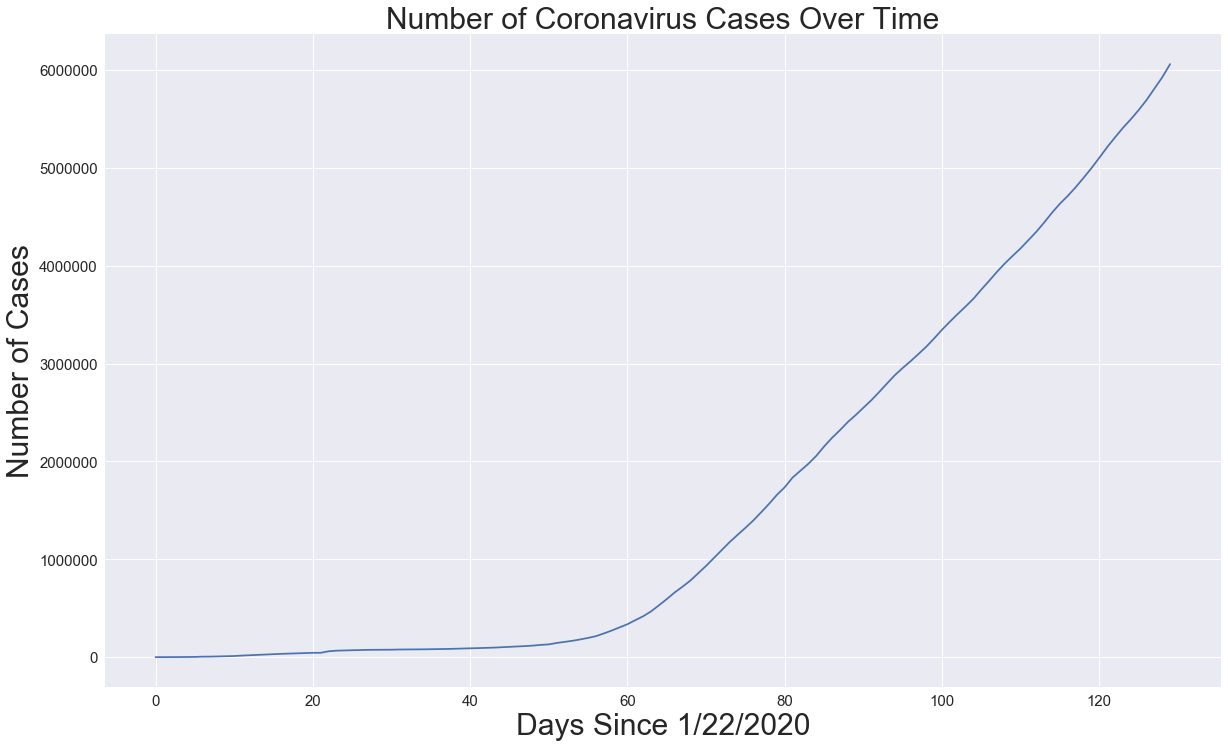

In [57]:
#Total number of coronavirus cases over time

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,world_cases)
plt.title('Number of Coronavirus Cases Over Time',size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

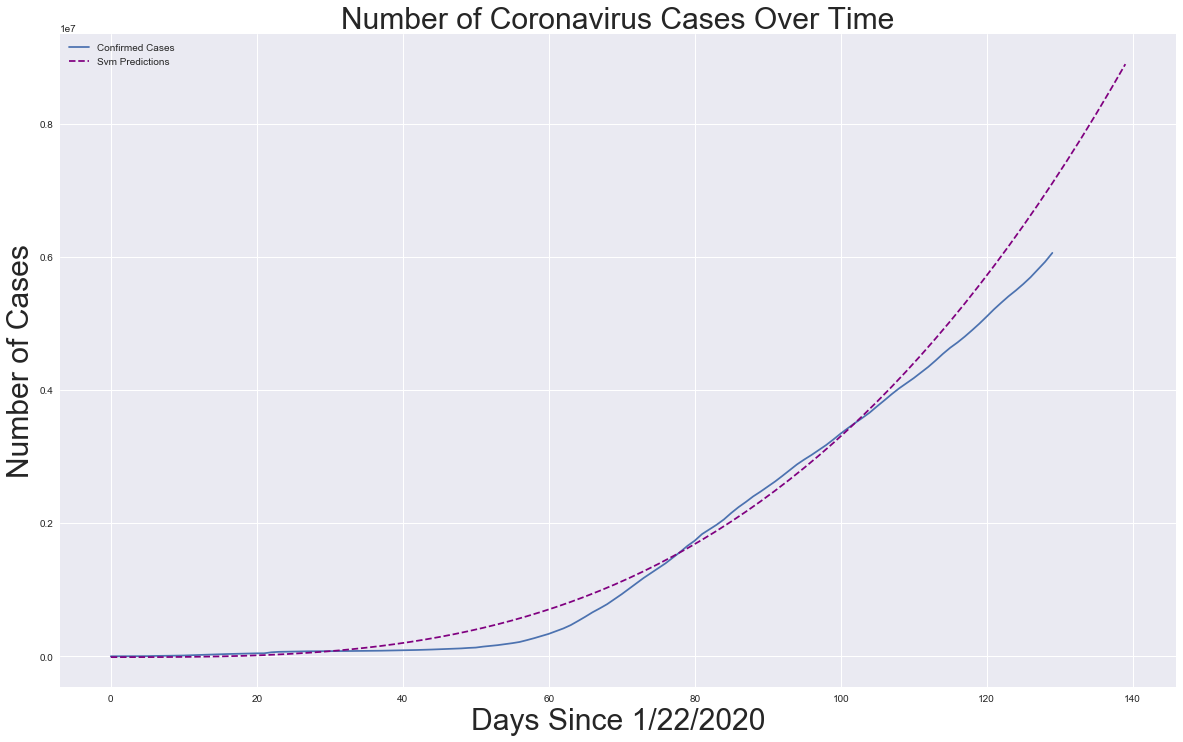

In [58]:
#Confirmed vs Predicted cases

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,world_cases)
plt.plot(future_forecast,svm_pred,linestyle='dashed',color='purple')
plt.title('Number of Coronavirus Cases Over Time',size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases','Svm Predictions'])
plt.show()

In [74]:
#Prediction for the next 10 days using SVM
print('SVM future predictions:')
set(zip(future_forecast_dates[-10:],svm_pred[-10:]))

SVM future predictions:


{('05/11/00', 7273537.7451697085),
 ('05/12/00', 7442979.016756652),
 ('05/13/00', 7615027.026114682),
 ('05/14/00', 7789701.672005618),
 ('05/15/00', 7967022.853190893),
 ('05/16/00', 8147010.468432197),
 ('05/17/00', 8329684.4164911155),
 ('05/18/00', 8515064.59612933),
 ('05/19/00', 8703170.906108322),
 ('05/20/00', 8894023.245189885)}

In [66]:
#Using linear regression model to make predictions
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression(normalize=True,fit_intercept=True)
linear_model.fit(X_train_confirmed,y_train_confirmed)
test_linear_pred=linear_model.predict(X_test_confirmed)
linear_pred=linear_model.predict(future_forecast)
print('MAE:',mean_absolute_error(test_linear_pred,y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred,y_test_confirmed))

MAE: 1751344.380183937
MSE: 3195937135756.724


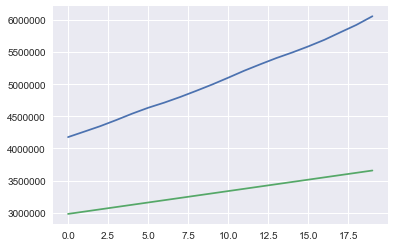

In [75]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

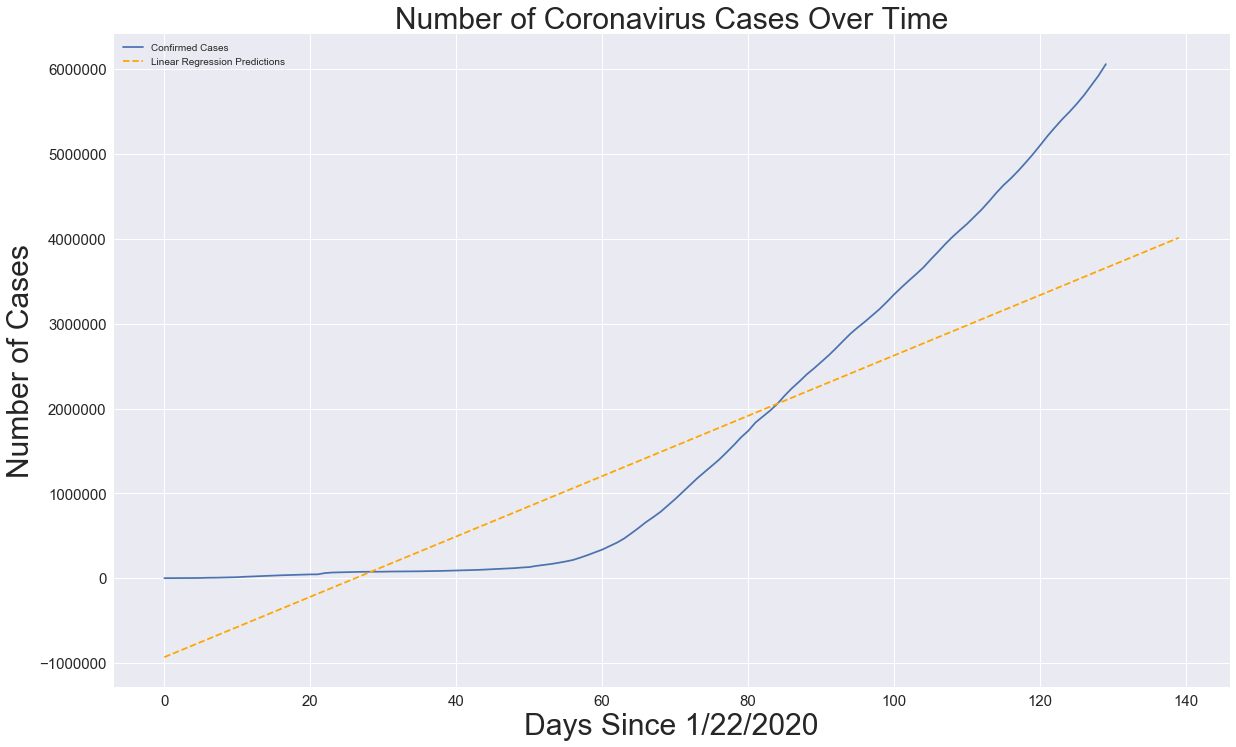

In [78]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,world_cases)
plt.plot(future_forecast,linear_pred,linestyle='dashed',color='orange')
plt.title('Number of Coronavirus Cases Over Time',size=30)
plt.xlabel('Days Since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases','Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [79]:
#Prediction for next 10 days using Linear Regression
print('Linear Regression Future Predictions')
print(linear_pred[-10:])

Linear Regression Future Predictions
[[3692850.79245768]
 [3728415.5708045 ]
 [3763980.34915132]
 [3799545.12749814]
 [3835109.90584496]
 [3870674.68419178]
 [3906239.4625386 ]
 [3941804.24088542]
 [3977369.01923224]
 [4012933.79757906]]


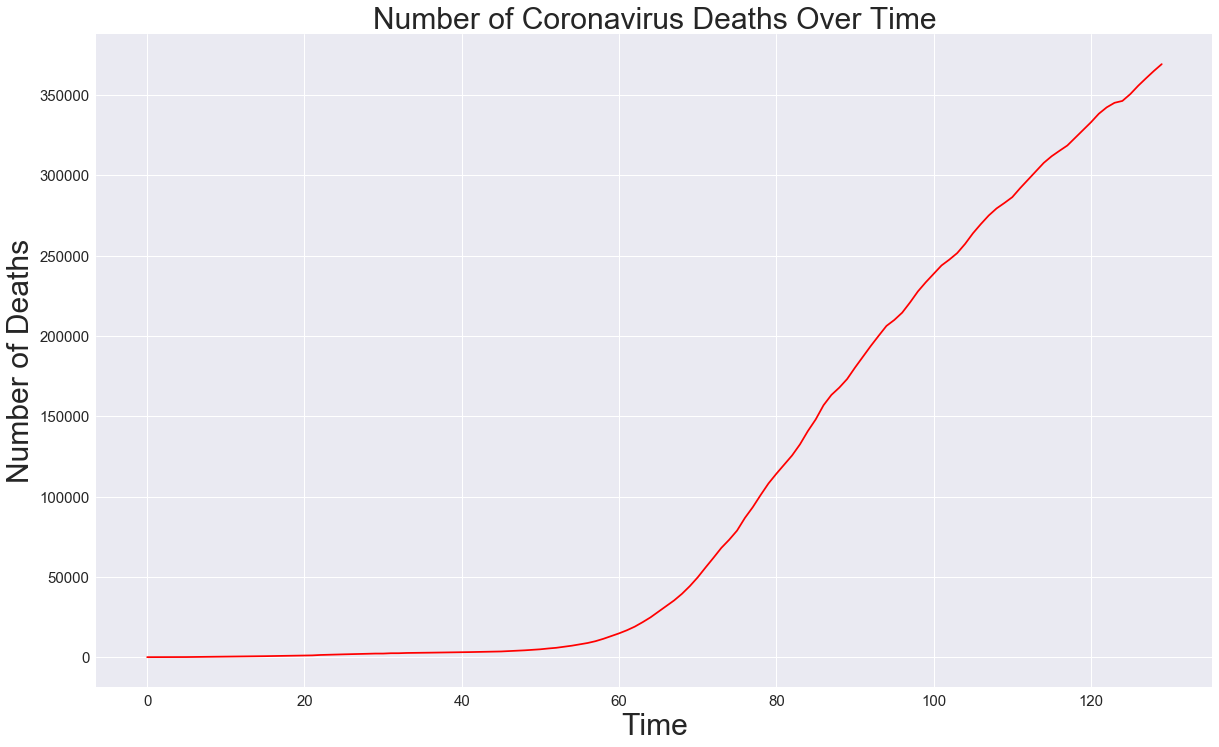

In [81]:
#Total deaths over time
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_death,color='red')
plt.title('Number of Coronavirus Deaths Over Time',size=30)
plt.xlabel('Time',size=30)
plt.ylabel('Number of Deaths',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

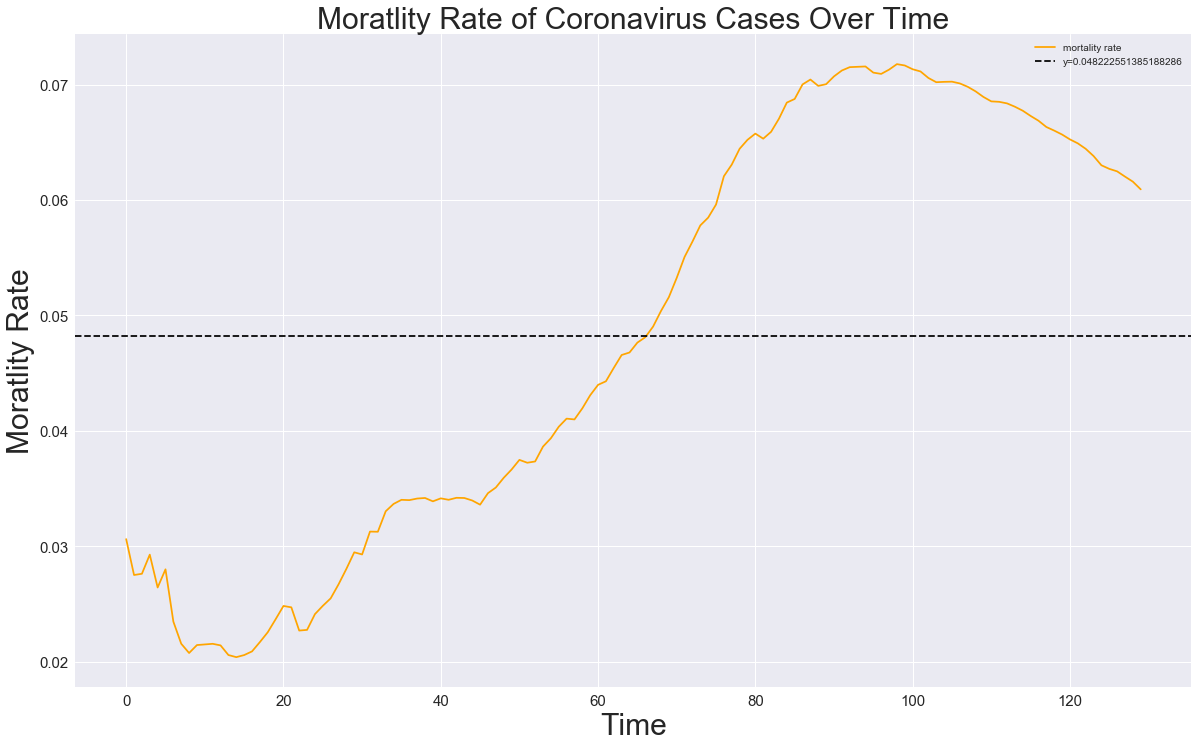

In [82]:
mean_mortality_rate=np.mean(mortality_rate)
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,mortality_rate,color='orange')
plt.axhline(y=mean_mortality_rate,linestyle='--',color='black')
plt.title('Moratlity Rate of Coronavirus Cases Over Time',size=30)
plt.legend(['mortality rate','y='+str(mean_mortality_rate)])
plt.xlabel('Time',size=30)
plt.ylabel('Moratlity Rate',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

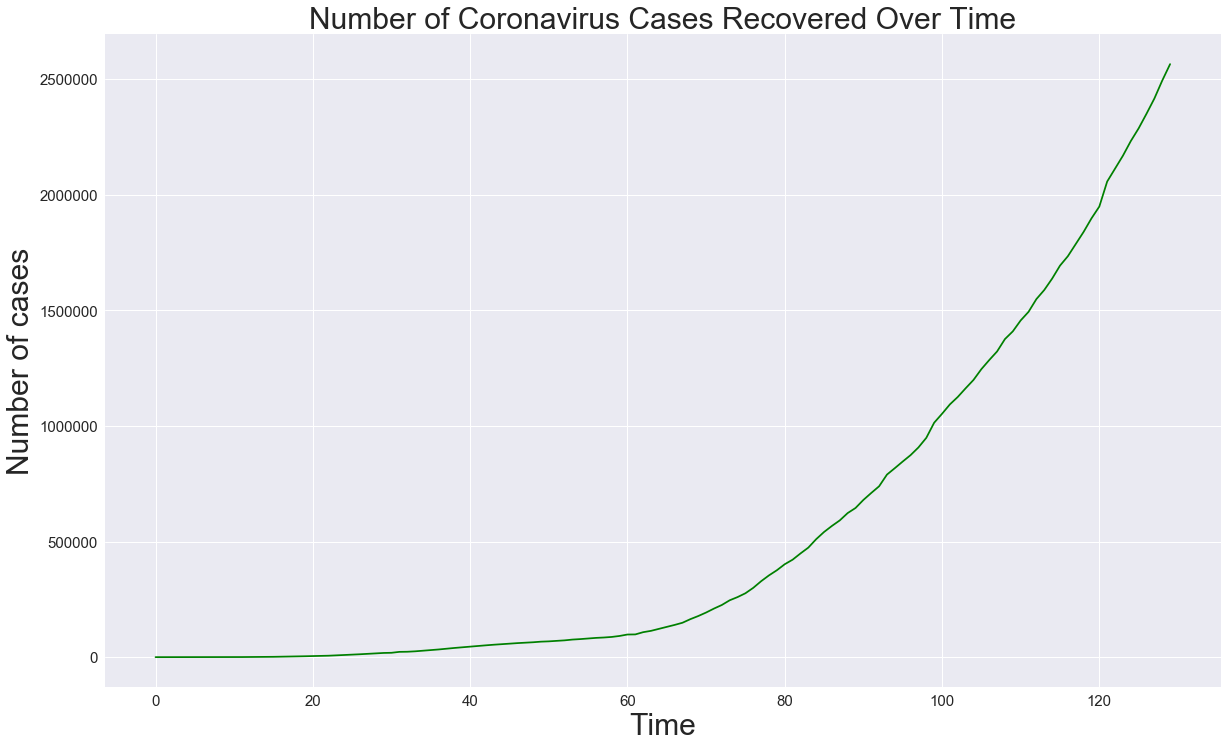

In [83]:
#Coronavirus Cases Recovered Over Time
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_recovered,color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time',size=30)
plt.xlabel('Time',size=30)
plt.ylabel('Number of cases',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

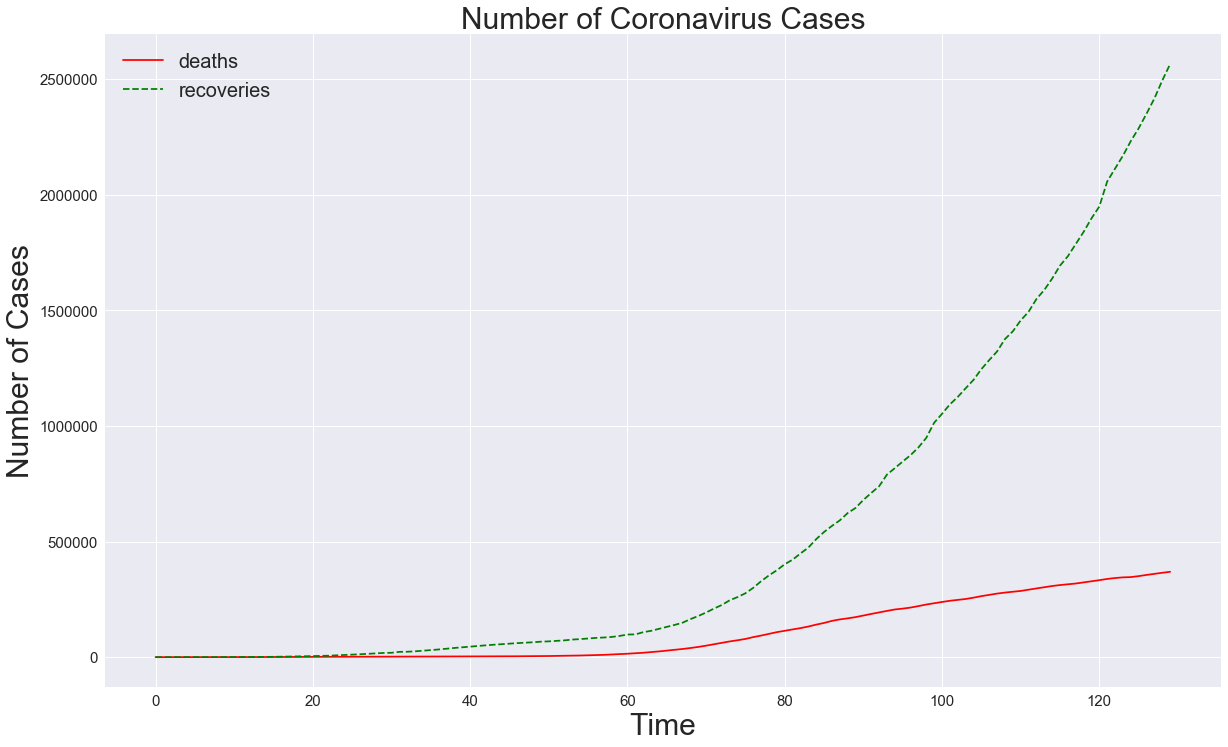

In [85]:
#Number of coronavirus cases recovered vs number of deaths
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,total_death,color='r')
plt.plot(adjusted_dates,total_recovered,linestyle='--',color='green')
plt.title('Number of Coronavirus Cases',size=30)
plt.legend(['deaths','recoveries'],loc='best',fontsize=20)
plt.xlabel('Time',size=30)
plt.ylabel('Number of Cases',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

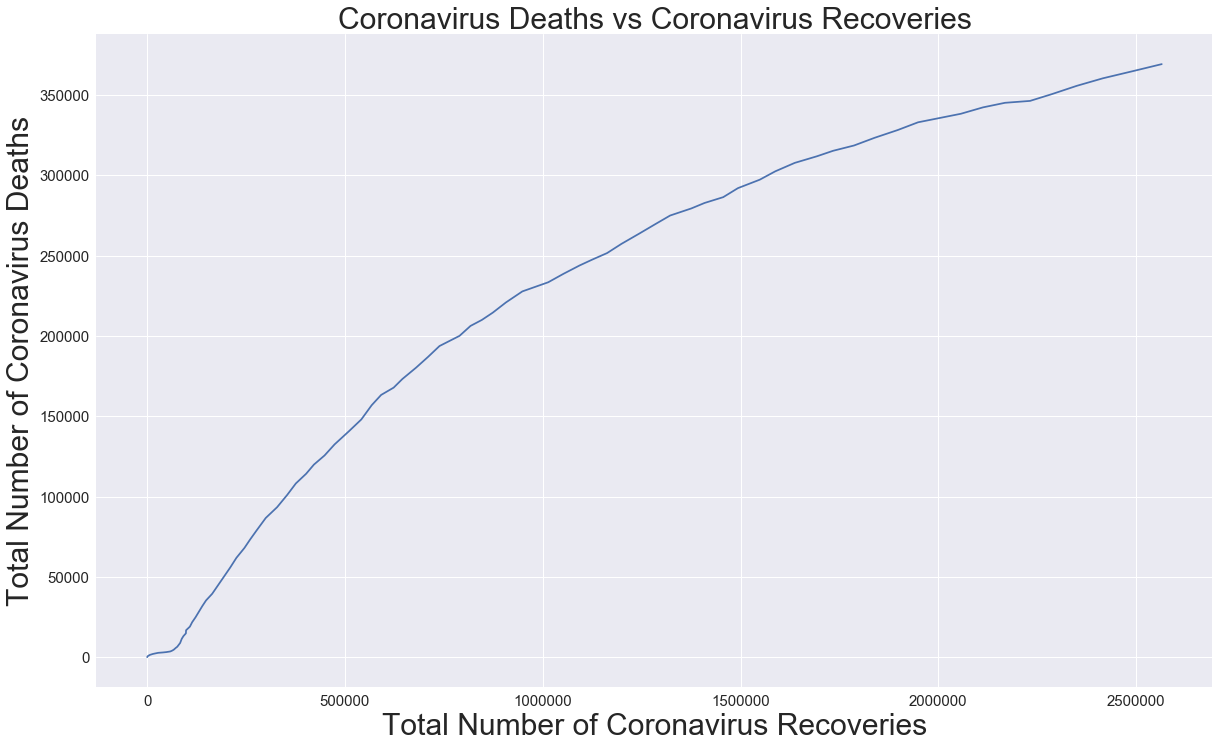

In [87]:
#Coronavirus Deaths vs Recoveries
plt.figure(figsize=(20,12))
plt.plot(total_recovered,total_death)
plt.title('Coronavirus Deaths vs Coronavirus Recoveries',size=30)
plt.xlabel('Total Number of Coronavirus Recoveries',size=30)
plt.ylabel('Total Number of Coronavirus Deaths',size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()